In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving human_vital_signs_dataset_2024.csv to human_vital_signs_dataset_2024.csv


In [4]:
df = pd.read_csv('human_vital_signs_dataset_2024.csv')
df.head()

,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64


In [22]:
clean_strategy = {
    'numeric': 'mean',    # or 'median', 'zero', etc.
    'datetime': 'median',
    'categorical': 'mode',
    'text': 'unknown'
}

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if clean_strategy['numeric'] == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif clean_strategy['numeric'] == 'median':
            df[col] = df[col].fillna(df[col].median())

    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        if clean_strategy['datetime'] == 'median':
            df[col] = df[col].fillna(df[col].median())

    elif isinstance(df[col].dtype, pd.CategoricalDtype) or pd.api.types.is_object_dtype(df[col]):
        if clean_strategy['categorical'] == 'mode':
            if not df[col].mode().empty:
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(clean_strategy['text'])  # fallback if mode is empty
        else:
            df[col] = df[col].fillna(clean_strategy['text'])


In [7]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 0


In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


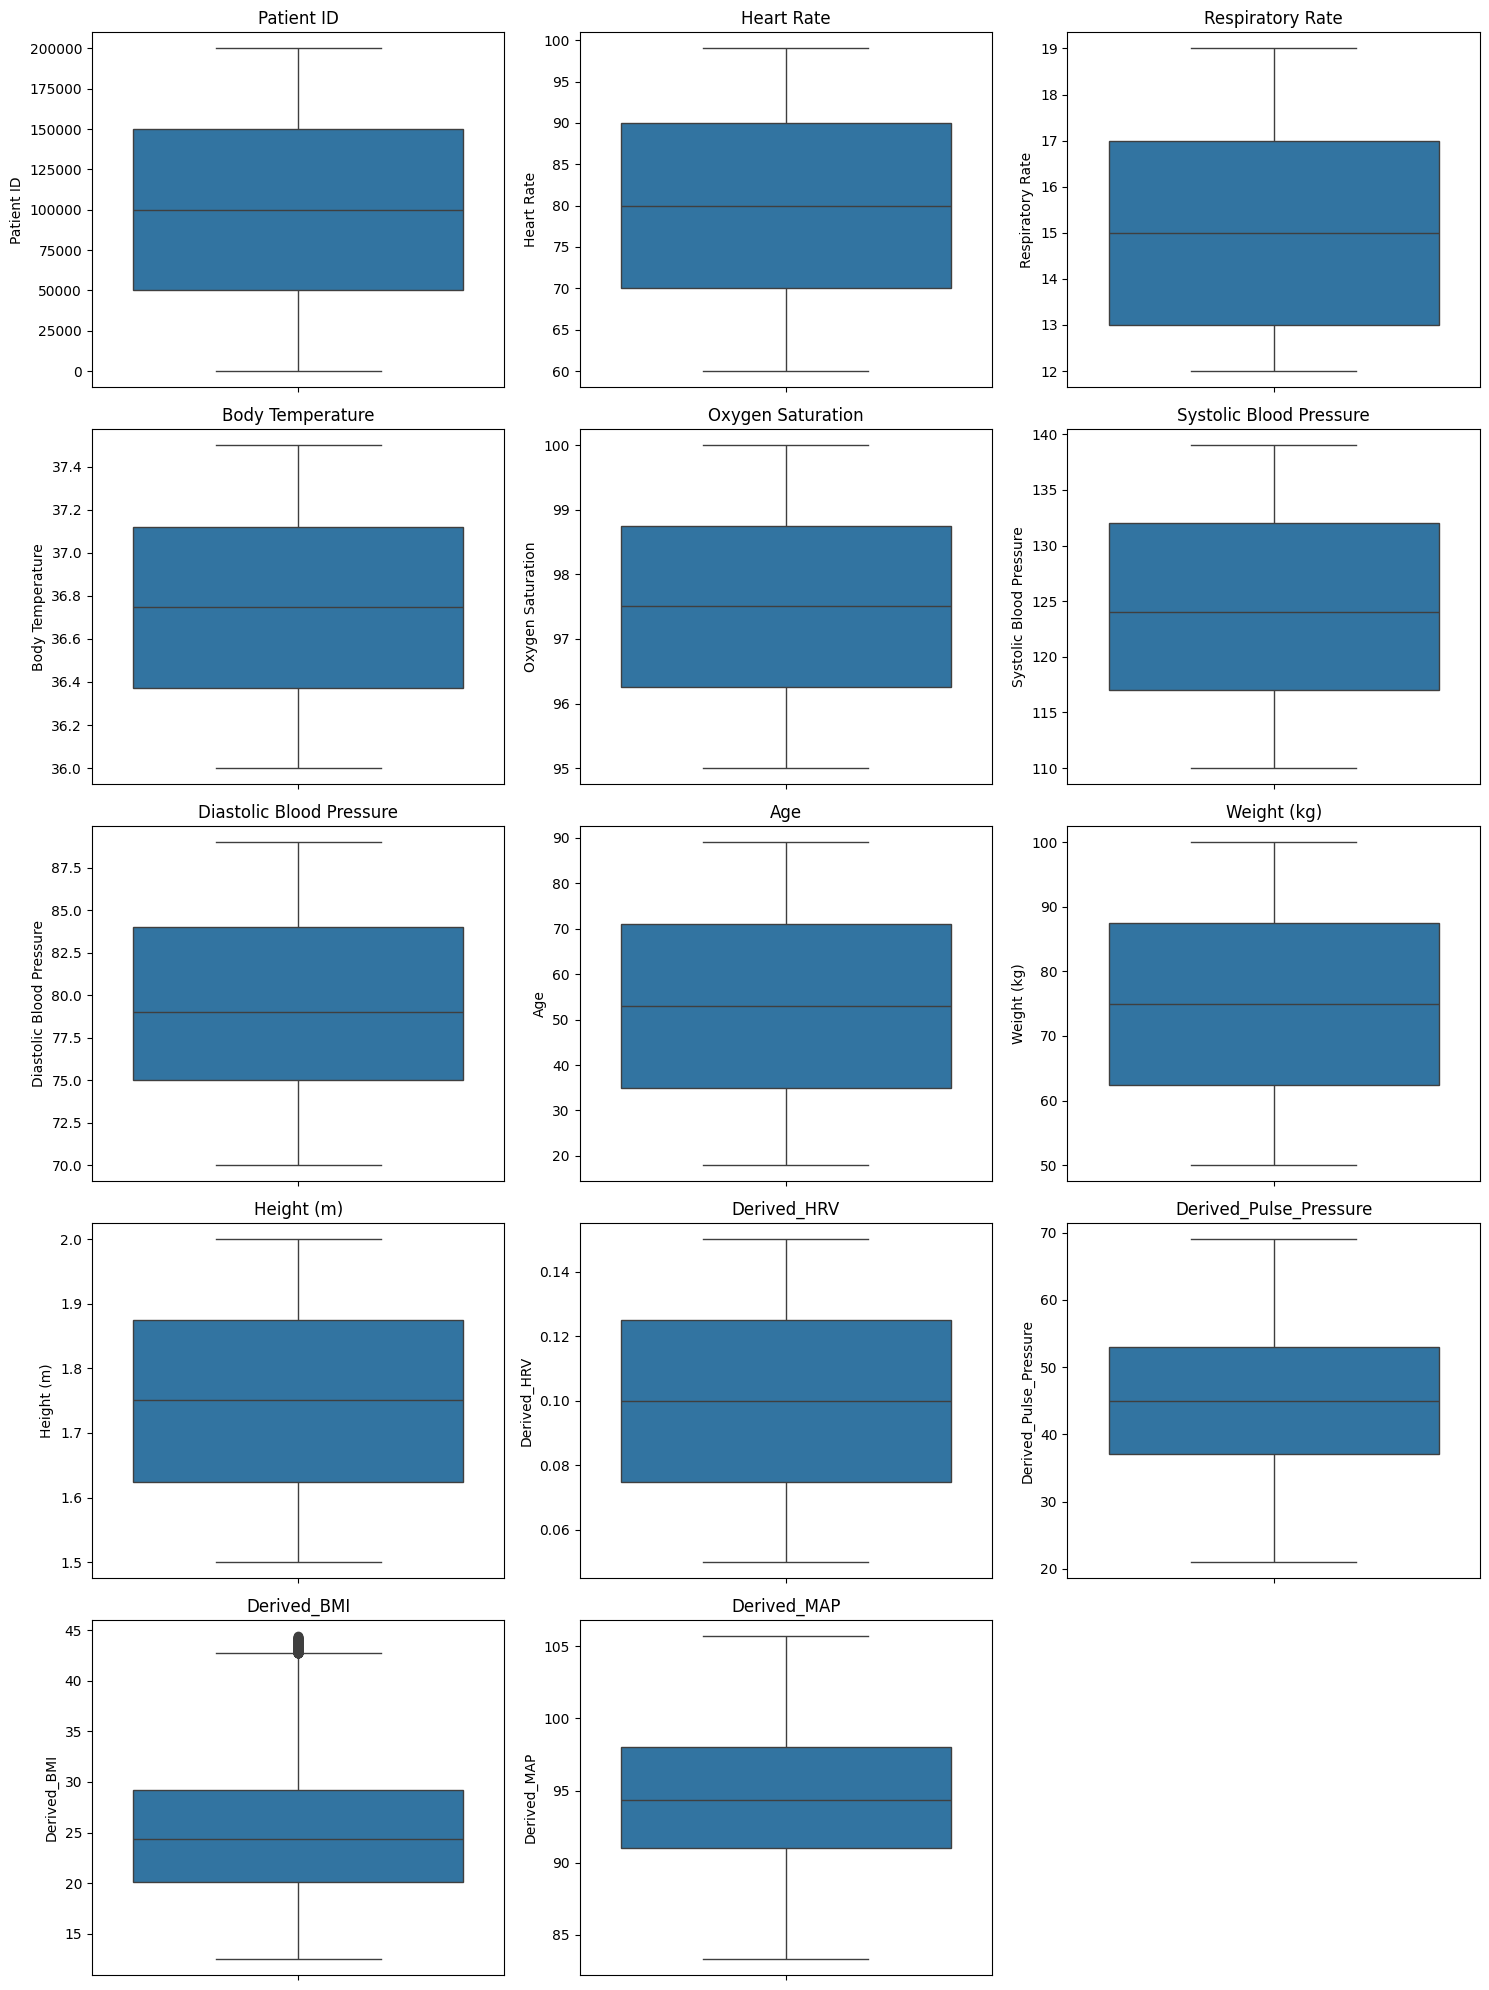

In [9]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
arr = np.array([1, 2, np.nan, 4, np.nan, 6])

In [11]:
arr_filled = np.nan_to_num(arr, nan=0)
print(arr_filled)

[1. 2. 0. 4. 0. 6.]


In [12]:
arr_2d = np.array([[1, np.nan, 3],
                   [4, 5, np.nan],
                   [np.nan, 8, 9]])
col_means = np.nanmean(arr_2d, axis=0)
print("Column means:", col_means)
for i in range(arr_2d.shape[1]):
    arr_2d[:, i] = np.nan_to_num(arr_2d[:, i], nan=col_means[i])

print(arr_2d)


Column means: [2.5 6.5 6. ]
[[1.  6.5 3. ]
 [4.  5.  6. ]
 [2.5 8.  9. ]]


In [16]:
mean_val = np.nanmean(arr)
arr_filled = np.where(np.isnan(arr), mean_val, arr)
median_val = np.nanmedian(arr)
arr_filled = np.where(np.isnan(arr), median_val, arr)
#Create a mask of NaN values
mask = np.isnan(arr)
# Get indices where we need to fill
idx = np.where(~mask, np.arange(len(arr)), 0)
np.maximum.accumulate(idx, out=idx)
arr_filled = arr[idx]

In [17]:
df.head()


,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [25]:
df.to_csv('cleaned_human_vital_signs_dataset_2024.csv', index=False)

# Download the CSV to your local machine
from google.colab import files
files.download('cleaned_human_vital_signs_dataset_2024.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>